In [4]:
import pandas as pd

In [5]:
mt = pd.read_csv('salary.csv')
mt

,Name,Income
0,A,10000
1,B,15000
2,C,8000
3,D,70000
4,E,6000
5,F,13000
6,G,5000


In [6]:
mt.describe()

,Income
count,7.000000
mean,18142.857143
std,23147.559781
min,5000.000000
25%,7000.000000
50%,10000.000000
75%,14000.000000
max,70000.000000


In [7]:
mt.Income.quantile(.75)

14000.0

In [8]:
mt.Income.quantile(0)

5000.0

In [9]:
mt.Income.quantile(1)

70000.0

In [10]:
mt.Income.quantile(.95)

53499.999999999956

In [11]:
mt.Income.quantile(0.75, interpolation='higher')

15000

In [12]:
mt.Income.quantile(0.75, interpolation='lower')

13000

In [13]:
percentile_99 =mt.Income.quantile(0.99)
percentile_99

66699.99999999997

In [14]:
mt[mt.Income > percentile_99]

,Name,Income
3,D,70000


In [15]:
mt[mt.Income <= percentile_99]

,Name,Income
0,A,10000
1,B,15000
2,C,8000
4,E,6000
5,F,13000
6,G,5000


In [33]:
import numpy as np

In [39]:
mt['Income'][2]=np.NaN

In [40]:
mt

,Name,Income
0,A,10000.0
1,B,15000.0
2,C,NaN
3,D,70000.0
4,E,6000.0
5,F,13000.0
6,G,5000.0


In [45]:
mat = mt.fillna(mt.Income.median())
mat

,Name,Income
0,A,10000.0
1,B,15000.0
2,C,11500.0
3,D,70000.0
4,E,6000.0
5,F,13000.0
6,G,5000.0


# Deviation:


In [49]:
M = pd.read_csv('weight-height.csv')
M.shape

(10000, 3)

In [54]:
import seaborn as sn


In [55]:
M.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [56]:
M.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

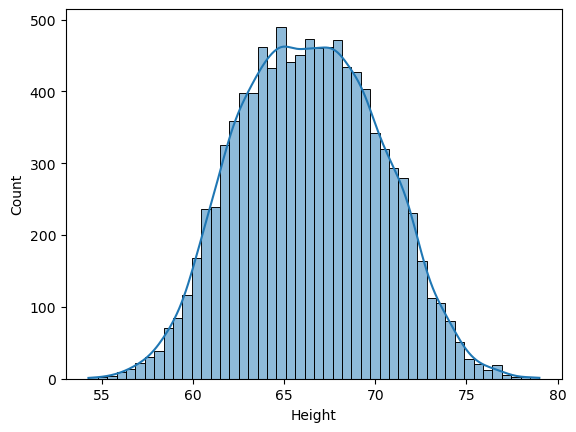

In [57]:
sn.histplot(M.Height, kde=True)

In [59]:
mn = M.Height.mean()
mn

66.367559754866

In [60]:
stdev= M.Height.std()
stdev

3.847528120795573

In [61]:
mn - 3*stdev

54.824975392479274

In [62]:
mn + 3*stdev

77.91014411725271

In [65]:
M[M.Height < 54.82]

,Gender,Height,Weight
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [66]:
M[M.Height > 77.91]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989698
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783


In [68]:
M[(M.Height<54.82)|(M.Height>77.91)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989698
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [70]:
no_outlier = M[(M.Height>54.82) & (M.Height<77.91)]
no_outlier

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


# Z score            

In [71]:
M['Z_Score'] = (M.Height - M.Height.mean())/M.Height.std()

In [72]:
M.head(8)

,Gender,Height,Weight,Z_Score
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
5,Male,67.253016,152.212156,0.230136
6,Male,68.785081,183.927889,0.628331
7,Male,68.348516,167.971111,0.514865


In [75]:
M[M.Z_Score>3]

,Gender,Height,Weight,Z_Score
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989698,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [76]:
M[M.Z_Score<-3]

,Gender,Height,Weight,Z_Score
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [77]:
M[(M.Z_Score>3)|(M.Z_Score<-3)]

,Gender,Height,Weight,Z_Score
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989698,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [79]:
No_outlier= M[(M.Z_Score<3)&(M.Z_Score>-3)]
No_outlier

,Gender,Height,Weight,Z_Score
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


# Logarithm:

In [93]:
L = pd.read_csv('revenue.csv')
L

,company,revenue
0,Tesla,31.0
1,UBER,11.0
2,Amazon,386.0
3,Jindal Steel,4.7
4,Axis Bank,5.6
5,Vedanta,11.3


<Axes: xlabel='company'>

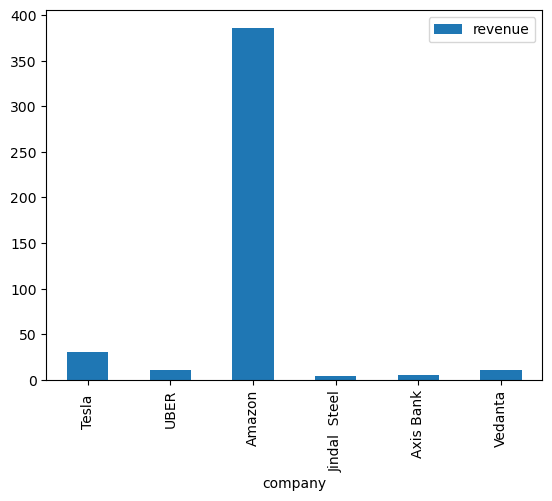

In [99]:
L.plot(x = 'company',y='revenue',kind='bar')

<Axes: xlabel='company'>

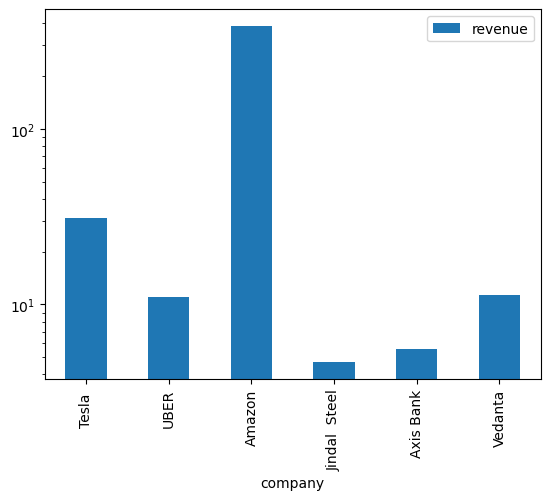

In [100]:
L.plot(x = 'company',y='revenue',kind='bar',logy=True)